In [2]:
## Victor Rene Pérez Mayen.
## 19005180

# Proyecto Python

In [238]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn as sk 
from sklearn.linear_model import LinearRegression

y = el precio de venta real de cierta casa
x = cierta característica de cierta casa
yhat = f(x) = precio estimado o predicción del precio de venta para una casa con
cierta característica x
m = pendiente de la recta que usamos para aproximar el precio de la casa yhat
b = intercepto de la recta que usamos para aproximar el precio de la casa yhat

In [165]:
a = np.load("proyecto_training_data.npy") #Data Set
abool = ~np.isnan(a) #Todos los Nan se convierten en 1 para evitar problemas con los valores.
ax0 = a[abool[:,0],0]
ax1 = a[abool[:,1],1]
ax2 = a[abool[:,2],2]
ax3 = a[abool[:,3],3]
ax4 = a[abool[:,4],4]
ax5 = a[abool[:,5],5]
print(a.shape)

(1460, 6)


In [144]:
a1 = int(1480*.8)
a2 = int(1480*.2)
print(a1)
print(a2)

1184
296


In [140]:
c = a[:a1,]
d = a[a1:,]
print(c)
print(d)

[[2.085e+05 7.000e+00 8.560e+02 8.000e+00 2.003e+03 6.500e+01]
 [1.815e+05 6.000e+00 1.262e+03 6.000e+00 1.976e+03 8.000e+01]
 [2.235e+05 7.000e+00 9.200e+02 6.000e+00 2.001e+03 6.800e+01]
 ...
 [3.925e+05 8.000e+00 1.652e+03 5.000e+00 2.008e+03 6.400e+01]
 [7.450e+05 1.000e+01 2.411e+03 1.000e+01 1.996e+03 1.600e+02]
 [1.200e+05 5.000e+00 1.130e+03 5.000e+00 1.920e+03 6.000e+01]]
[[1.86700e+05 5.00000e+00 1.57200e+03 5.00000e+00 1.96300e+03 5.00000e+01]
 [1.04900e+05 5.00000e+00 9.49000e+02 7.00000e+00 1.92400e+03 6.00000e+01]
 [9.50000e+04 3.00000e+00 1.01400e+03 7.00000e+00 1.90000e+03 1.07000e+02]
 ...
 [2.66500e+05 7.00000e+00 1.18800e+03 9.00000e+00 1.94100e+03 6.60000e+01]
 [1.42125e+05 5.00000e+00 1.07800e+03 5.00000e+00 1.95000e+03 6.80000e+01]
 [1.47500e+05 5.00000e+00 1.25600e+03 6.00000e+00 1.96500e+03 7.50000e+01]]


In [171]:
np.hstack((np.mean(ax0),np.mean(ax1), np.mean(ax2),np.mean(ax3), np.mean(ax4), np.mean(ax5))) #media

array([1.80921196e+05, 6.09931507e+00, 1.16262671e+03, 6.51780822e+00,
       1.97126781e+03, 7.00499584e+01])

In [173]:
np.hstack((np.amax(ax0),np.amax(ax1), np.amax(ax2),np.amax(ax3), np.amax(ax4), np.amax(ax5))) #máximo

array([7.550e+05, 1.000e+01, 4.692e+03, 1.400e+01, 2.010e+03, 3.130e+02])

In [174]:
np.hstack((np.amin(ax0),np.amin(ax1), np.amin(ax2),np.amin(ax3), np.amin(ax4), np.amin(ax5))) #mínimo

array([3.490e+04, 1.000e+00, 3.340e+02, 2.000e+00, 1.872e+03, 2.100e+01])

In [183]:
np.hstack((np.std(ax0),np.std(ax1), np.std(ax2),np.std(ax3), np.std(ax4), np.std(ax5))) #desviacion estandar

array([7.94152919e+04, 1.38252284e+00, 3.86455322e+02, 1.62483655e+00,
       3.01925588e+01, 2.42746394e+01])

In [244]:
np.hstack((np.ptp(ax0),np.ptp(ax1),np.ptp(ax2),np.ptp(ax3),np.ptp(ax4),np.ptp(ax5))) #Rango pico a pico

array([7.201e+05, 9.000e+00, 4.358e+03, 1.200e+01, 1.380e+02, 2.920e+02])

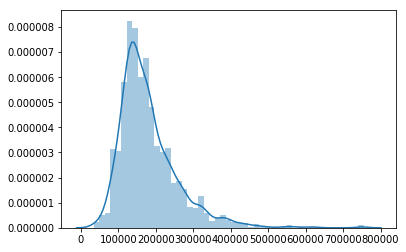

In [175]:
sns.distplot(ax0)

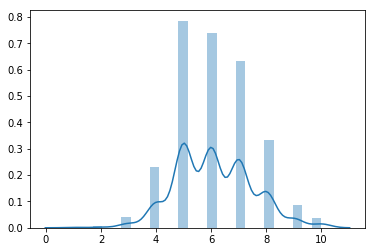

In [176]:
sns.distplot(ax1)

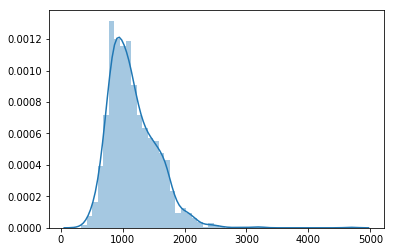

In [177]:
sns.distplot(ax2)

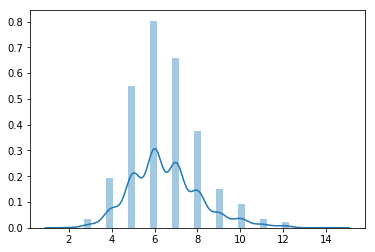

In [178]:
sns.distplot(ax3)

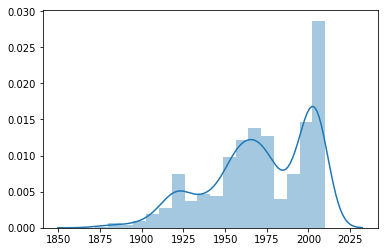

In [179]:
sns.distplot(ax4)

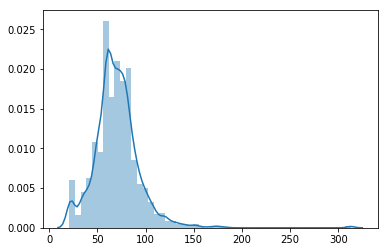

In [180]:
sns.distplot(ax5)

In [226]:
ax1cof = np.amin(np.amin(np.corrcoef(ax0,ax1)))
ax2cof = np.amin(np.amin(np.corrcoef(ax0,ax2)))
ax3cof = np.amin(np.amin(np.corrcoef(ax0,ax3)))
ax4cof = np.amin(np.amin(np.corrcoef(ax0,ax4)))
ax5cof = np.amin(np.amin(np.corrcoef(ax0[abool[:,5]],ax5)))

np.hstack([ax1cof,ax2cof,ax3cof,ax4cof,ax5cof]) #Correlacion lineal

array([0.7909816 , 0.60585218, 0.53372316, 0.52289733, 0.3517991 ])

Text(0.5, 1.0, '0.7909816005838047')

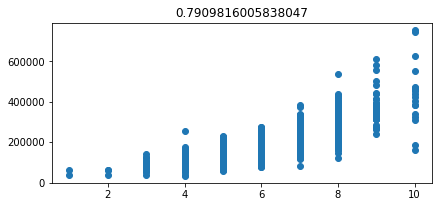

In [231]:
graficas = plt.figure(figsize = (15,10))
plt.subplot(3,2,1)
plt.scatter(a[::,1], a[::,0]);
plt.title(ax1cof)

Text(0.5, 1.0, '0.6058521846919147')

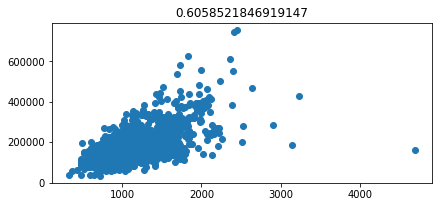

In [233]:
graficas = plt.figure(figsize = (15,10))
plt.subplot(3,2,2)
plt.scatter(a[::,2], a[::,0]);
plt.title(ax2cof)

Text(0.5, 1.0, '0.5337231555820284')

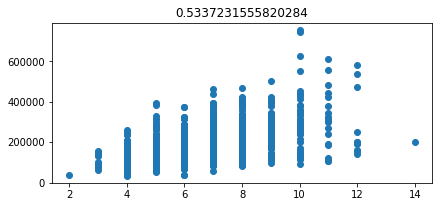

In [234]:
graficas = plt.figure(figsize = (15,10))
plt.subplot(3,2,3)
plt.scatter(a[::,3], a[::,0]);
plt.title(ax3cof)

Text(0.5, 1.0, '0.5228973328794969')

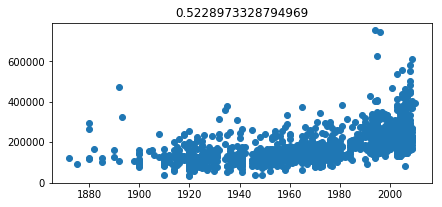

In [235]:
graficas = plt.figure(figsize = (15,10))
plt.subplot(3,2,4)
plt.scatter(a[::,4], a[::,0]);
plt.title(ax4cof)

Text(0.5, 1.0, '0.35179909657067804')

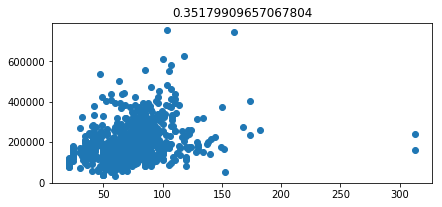

In [236]:
graficas = plt.figure(figsize = (15,10))
plt.subplot(3,2,5)
plt.scatter(a[::,5], a[::,0]);
plt.title(ax5cof)

In [246]:
print(c.shape)

(1184, 6)


In [250]:
c[:,0]
c.shape

(1184, 6)